In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


In [2]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\Hourly Patient Data.xlsx")

In [3]:
data['Time'] = pd.to_datetime(data['Time'])

In [4]:
data.set_index('Time', inplace=True)

In [5]:
data.drop(columns=['ESI 2', 'ESI 1', 'ESI 3', 'ESI 4'], inplace=True)

In [6]:
esi1_daily = data['ESI 5'].resample('D').sum()

In [7]:
esi1_daily_df = esi1_daily.reset_index()

In [8]:
esi1_daily_df.columns = ['Date', 'ESI 5']

In [9]:
print(esi1_daily_df)

           Date  ESI 5
0    2017-01-01      2
1    2017-01-02      2
2    2017-01-03      4
3    2017-01-04      3
4    2017-01-05      1
...         ...    ...
1456 2020-12-27      5
1457 2020-12-28      8
1458 2020-12-29      9
1459 2020-12-30      8
1460 2020-12-31      3

[1461 rows x 2 columns]


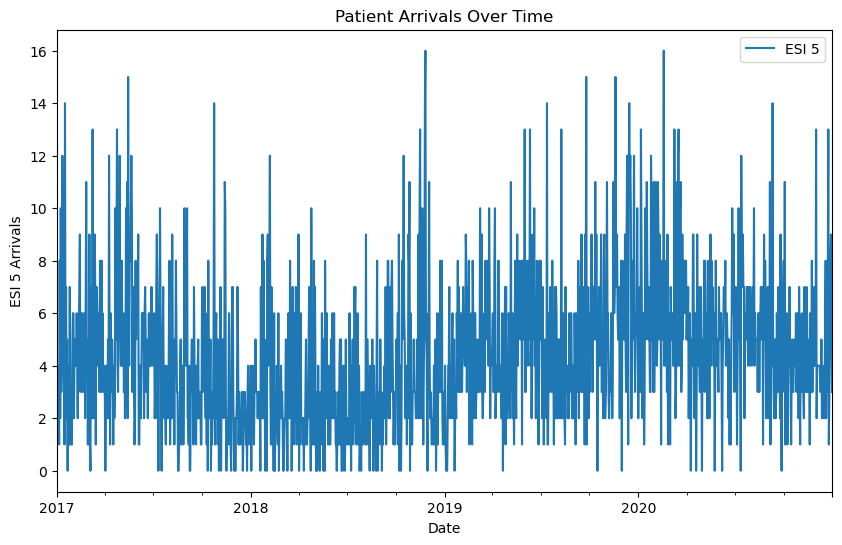

In [10]:
esi1_daily_df.plot(x='Date', y='ESI 5', figsize=(10, 6))
plt.title('Patient Arrivals Over Time')
plt.xlabel('Date')
plt.ylabel('ESI 5 Arrivals')
plt.show()

In [11]:
train_size = int(len(esi1_daily_df) * 0.9)  
train, test = esi1_daily_df.iloc[:train_size], esi1_daily_df.iloc[train_size:]

In [12]:
model = auto_arima(train['ESI 5'], seasonal=True, m=7,
                   start_p=1, start_q=1, start_P=1, start_Q=1,
                   max_p=5, max_q=5, max_P=5, max_Q=5,
                   d=None, D=None, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=6329.665, Time=2.31 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=7140.665, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=6800.086, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=6352.536, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=7138.669, Time=0.03 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=6350.038, Time=0.84 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=6349.461, Time=0.93 sec
 ARIMA(1,1,1)(2,0,1)[7] intercept   : AIC=6334.129, Time=4.86 sec
 ARIMA(1,1,1)(1,0,2)[7] intercept   : AIC=6320.694, Time=4.57 sec
 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=6349.494, Time=1.75 sec
 ARIMA(1,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=8.01 sec
 ARIMA(1,1,1)(1,0,3)[7] intercept   : AIC=6332.040, Time=5.54 sec
 ARIMA(1,1,1)(0,0,3)[7] intercept   : AIC=6350.864, Time=2.33 sec
 ARIMA(1,1,1)(2,0,3)[7] intercept   : AIC=inf, Time=7.80 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=i

In [13]:
n_periods = len(test)
forecast_values = model.predict(n_periods=n_periods)

In [14]:
print("Forecasted values:")
print(forecast_values)

Forecasted values:
1314    6.406717
1315    6.102493
1316    4.761350
1317    6.350610
1318    6.231859
          ...   
1456    5.702115
1457    6.344759
1458    6.306170
1459    6.152764
1460    6.217969
Length: 147, dtype: float64


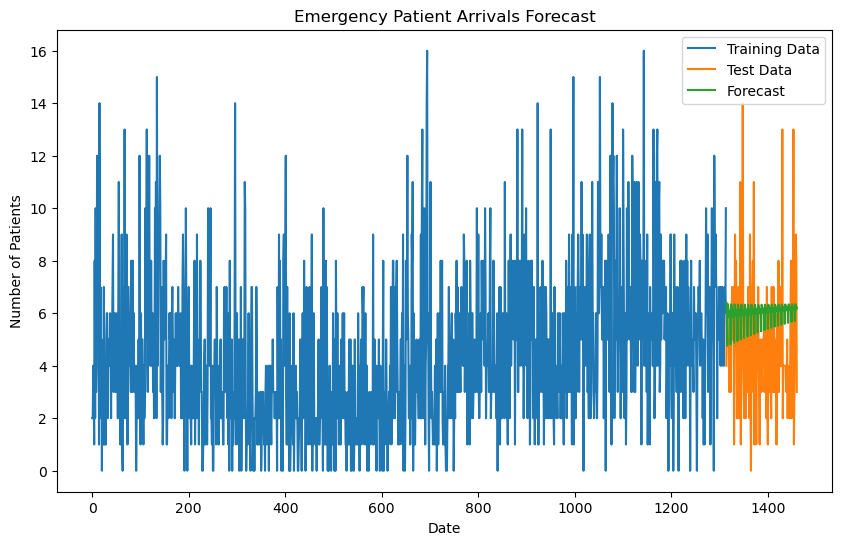

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['ESI 5'], label='Training Data')
plt.plot(test.index, test['ESI 5'], label='Test Data')
plt.plot(test.index, forecast_values, label='Forecast')
plt.title('Emergency Patient Arrivals Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.legend()
plt.show()

In [16]:
def mean_absolute_percentage_error(actual, forecast):
  
   
    actual, forecast = np.array(actual), np.array(forecast)
    return np.mean(np.abs((actual - forecast) / actual)) * 100

In [17]:
mape = mean_absolute_percentage_error(test['ESI 5'], forecast_values)
print("MAPE:", mape)

MAPE: inf


C:\Users\kriti\AppData\Local\Temp\ipykernel_16748\133553794.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((actual - forecast) / actual)) * 100


In [18]:
def root_mean_squared_error(actual, forecast):
    
    actual, forecast = np.array(actual), np.array(forecast)
    return np.sqrt(np.mean((actual - forecast) ** 2))

In [19]:
rmse = root_mean_squared_error(test['ESI 5'], forecast_values)
print("RMSE:", rmse)

RMSE: 2.6865895824186508


In [20]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    # Find indices of zero values in y_true
    zero_indices = np.where(y_true == 0)[0]
    
    # Create a boolean mask to filter zero values
    mask = np.ones(len(y_true), dtype=bool)
    mask[zero_indices] = False
    
    # Filter y_true and y_pred using the mask
    y_true_filtered = y_true[mask]
    y_pred_filtered = y_pred[mask]
    
    # Calculate absolute percentage error
    absolute_errors = np.abs(y_true_filtered - y_pred_filtered)
    
    # Calculate percentage errors
    percentage_errors = absolute_errors / y_true_filtered
    
    # Calculate mean absolute percentage error
    mape = np.mean(percentage_errors) * 100
    return mape


mape = mean_absolute_percentage_error(test['ESI 5'], forecast_values)
print("MAPE:", mape)


MAPE: 79.81111840630699


In [21]:
import numpy as np

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


mae = mean_absolute_error(test['ESI 5'], forecast_values)
print("MAE:", mae)

MAE: 2.211971930775743
